# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
print(type(X))
print(type(y))
# your code here
df_X = pd.DataFrame(X)
df_X.to_csv('mnist_784_X.csv', index = False)
df_y = pd.DataFrame(y)
df_y.to_csv('mnist_784_y.csv', index = False)
df_mnist = pd.DataFrame(X, y)
df_mnist.to_csv('mnist_784.csv', columns = None)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


b) Plot the singular value plot for a single example of the 0 digit (5 points)

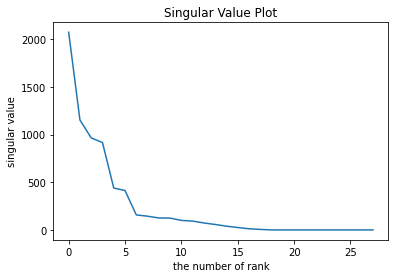

In [178]:
import numpy as np
from numpy.linalg import svd

df_mnist_0 = df_mnist.loc['0']

ex_digit= df_mnist_0.sample().values.flatten()
ex_digit = ex_digit.reshape(28, 28)

U, Sigma, Vt = svd(ex_digit)
plt.plot(Sigma)
plt.xlabel('the number of rank')
plt.ylabel('singular value')
plt.title('Singular Value Plot')
plt.show()


c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

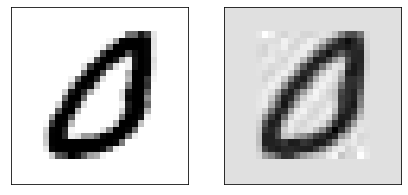

In [179]:
Rank = 6  # choose rank k and set the singular values beyond k to zero (determined through the elbow graph above)
Scopy = Sigma.copy()
Scopy[Rank:] = 0
digitApprox = U.dot(np.diag(Scopy)).dot(Vt)

fig, axes = plt.subplots(1, 2, figsize = (7, 7))
axes[0].set(xticks = [], yticks =[])
axes[0].imshow(ex_digit, interpolation='nearest', cmap = plt.cm.binary)
axes[1].set(xticks = [], yticks =[])
axes[1].imshow(digitApprox, interpolation='nearest', cmap = plt.cm.binary)
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. (10 points)

In [92]:
digit_matrix = df_X.values.flatten()
digit_matrix = digit_matrix.reshape(70000, 28, 28)

u, s, vt = svd(digit_matrix, full_matrices = False)

Rank = 10

sigCopy = s.copy()
sigCopy[Rank:] = 0

digitMatrixApprox = np.matmul(u, sigCopy[..., None] * vt)
(a, b, c)= digitMatrixApprox.shape
digitMatrixApprox = digitMatrixApprox.reshape(a, b*c)
pd.DataFrame(digitMatrixApprox).to_csv('Approximation.csv', index = False)

-> I chose 10 as a rank because it is the minimal number that shows the digit clearly except one digit. Even though it shows one digit blurry and unclearly(I guess it is because of the outlier), it is a best choice as this happens until Rank become higher than 68000. Also, it takes much shorter to run. 

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. (10 points)

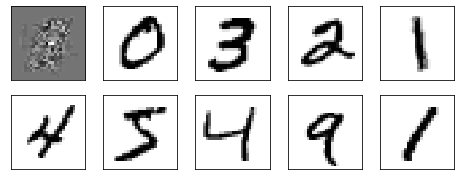

In [135]:
from sklearn.cluster import KMeans
ApproxKmeans = KMeans(n_clusters= 10)
ApproxClusters = ApproxKmeans.fit_predict(digitMatrixApprox)

fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = ApproxKmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip (ax.flat, centers):
    axi.set(xticks = [], yticks =[])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

f) Repeat e) on the original dataset. Comment on any differences (or lack thereof) you observe. (8 points)

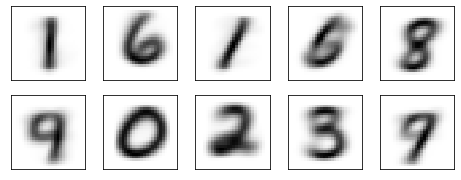

In [94]:
digit_matrix = digit_matrix.reshape(70000, 784)
kmeans = KMeans(n_clusters= 10)
clusters = kmeans.fit_predict(digit_matrix)

fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip (ax.flat, centers):
    axi.set(xticks = [], yticks =[])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

-> I can see the difference that the plots in e) is more clear than f) (the plots in f seem more blurry) except for the just one unclear plot in e). 

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [183]:
def disagreement_dist(P_labels, C_labels):
    df_label = pd.DataFrame(list(zip(P_labels, C_labels)), columns = ['P', 'C'])
    disagreement_dist = 0
    leng = len(df_label['P'].value_counts())
    for i in range(leng):
        df_target = df_label[df_label['P'] == i]
        count_list= list(df_target['C'].value_counts())
        for j in range(len(count_list)-1):
            disagreement_dist += count_list[j]*sum(count_list[j+1:])
    for i in range(leng):
        df_target = df_label[df_label['C'] == i]
        count_list = list(df_target['P'].value_counts())
        for j in range(len(count_list)-1):
            disagreement_dist += count_list[j]*sum(count_list[j+1:])
    return disagreement_dist

eLabel = ApproxKmeans.labels_
fLabel = kmeans.labels_
trueLabel = df_y.to_numpy(dtype= 'int32').flatten()

disagree_dist_e = disagreement_dist(eLabel, trueLabel)
disagree_dist_f = disagreement_dist(fLabel, trueLabel)
print("Compare two disagree distances by extracting them: " + str(disagree_dist_e - disagree_dist_f))


Compare two disagree distances by extracting them: 2202813120


-> As we can see above the disagree distance of e is significantly larger than the disagree distance of f. I can assume that it is because I changed the singular values beyond rank 10 to zero. 

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [184]:
sigCopy2 = s.copy()
sigCopy2[10:] = 0
digitMatrixApprox10 = np.matmul(u, sigCopy2[..., None] * vt)
digitMatrixApprox10.shape
(a, b, c)= digitMatrixApprox10.shape
digitMatrixApprox10 = digitMatrixApprox10.reshape(a, b*c)

diff_matrix = digit_matrix - digitMatrixApprox10
print(diff_matrix)

TypeError: 'set' object does not support item assignment

i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

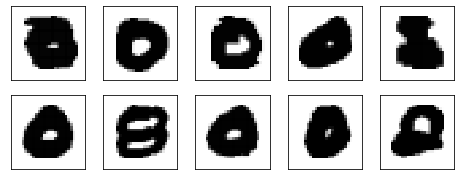

In [149]:
norm = np.linalg.norm(diff_matrix, axis = 1, keepdims = True)
df_norm = pd.DataFrame(norm, columns= ['norm'])
largestnorms = df_norm.nlargest(10, 'norm')
largestnorms = largestnorms.to_dict()

fig, ax = plt.subplots(2, 5, figsize = (8, 3))

for axi, i in zip (ax.flat, largestnorms['norm']):
    plot = digit_matrix[i].reshape(28, 28)
    axi.set(xticks = [], yticks =[])
    axi.imshow(plot, interpolation = 'nearest', cmap = plt.cm.binary)

-> Since the largest rows indicate that the difference between the original dataset and the approximate dataset is large, it would probably mean that they are outliers(anomalous data points) with a significant difference.

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

categories = ['comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
news_data = fetch_20newsgroups(subset='train', categories=categories)

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [180]:
from nltk.tokenize import word_tokenize
import string

s = set(string.punctuation)
filtered_word = []
tokenWords = [word_tokenize(i) for i in news_data['data']]
for words in tokenWords:
    wordslist = []
    for w in words:
        if w not in s and w != "--":
            wordslist.append(w)
    filtered_word.append(wordslist)


snow_stemmer = SnowballStemmer(language = 'english')
stem_words = []
for fWords in filtered_word:
    wordslist = []
    for fw in fWords:
        if not fw.isnumeric():
            w = snow_stemmer.stem(fw)
            wordslist.append(w)
    stem_words.append(wordslist)

c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [151]:
vectorizer = TfidfVectorizer(max_df= 0.5, min_df = 15)
new_stem = []
for words in stem_words:
    strWords = " ".join(words)
    new_stem.append(strWords)

vectors = vectorizer.fit_transform(new_stem)
df_matrix = pd.DataFrame(vectors.toarray())
df_matrix.to_csv("Stemmed TfidVectorizer.csv", index= None)

<font size="3"> -> For min_df, I thought it would be better to use an integer(I used 15) and a decimal value as the max_df. For min_df, I chose not to use words that are fewer than 15 uses to filter misspelled words and words that are not used frequently(which indicates that word is not that important). For max _df, if the terms appear more than 50%, it is more likely an articles 'a', 'an' and 'the' and other adjectives that do not contain important information

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

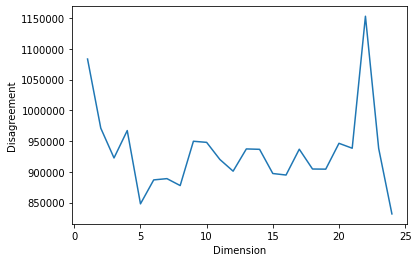

In [156]:
disagreement_distance = []

Uu, S, VT = np.linalg.svd(vectors.toarray(), full_matrices = False)

for k in range(1,25):
    scopy = S.copy()
    scopy[k: ] = 0
    dim_reduced_dataset = Uu @ np.diag(scopy) @ VT
    kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ticklabel_format(style='plain')
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()


-> We can evaluate from the graph that approximation with rank 5 is the best approach as the disagreement distance of rank 5 is the lowest.

In [157]:
###<Tried to solve this problem using PCA>###

# from sklearn.decomposition import PCA

# disagreement_distance = []
# for k in range(1,25):
#     dim_reduced_dataset = PCA(n_components = k).fit_transform(vectors.toarray())

#     kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit_predict(dim_reduced_dataset)
#     labelsk = kmeans.labels_
#     disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

# plt.plot(range(1,25), disagreement_distance)
# plt.ticklabel_format(style='plain')
# plt.ylabel('Disagreement')
# plt.xlabel('Dimension')
# plt.show()